In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from funzioni import compute_dataset_weighted
from funzioni import compute_annual_mean_weighted
from funzioni import convert_dataset_celsius
from funzioni import compute_anomaly
from funzioni import create_djf_dataset
from funzioni import compute_mean_time_season
from funzioni import compute_mean_resample_mar
from funzioni import plot_bias_atmos
from funzioni import plot_bias_tos
from funzioni import plot_mean_cluster_atmos
from funzioni import plot_mean_cluster_tos
from funzioni import plot_bias_2_models_atmos
from funzioni import plot_bias_2_models_tos
from funzioni import plot_std_cluster_atmos
from funzioni import plot_zonmean
from funzioni import plot_zonmean_2_cluster
from funzioni import plot_mean_cluster_zonmean
from funzioni import plot_std_cluster_tos
from funzioni import plot_std_cluster_zonmean
from funzioni import bs_sample_mean
from funzioni import bs_compute_array_mean_std_95cl
from funzioni import plot_bs_95cl_mean_std
from funzioni import bs_compute_matrix10
from funzioni import plot_bs_mean_cluster_matrix10
from funzioni import plot_bs_diff_cluster
from funzioni import compute_mean
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import plotly.express as px
import dill
import pickle
import cartopy.crs as ccrs
import random
from matplotlib.lines import Line2D

Caricamento dei file pickle

In [2]:
# Caricamento di models e models_atmos
with open('models_atmos.pkl','rb') as file:
    models_atmos = dill.load(file)
    era_na_seas_mean = dill.load(file)
with open('modelli_atmos.pickle', 'rb') as f:
    # Caricamento delle 5 liste contenenti i nomi dei modelli all'interno dei 5 cluster
    list_cluster0 = pickle.load(f)
    list_cluster1 = pickle.load(f)
    list_cluster2 = pickle.load(f)
    list_cluster3 = pickle.load(f)
    
    # Caricamento dei 5 cluster in formato pdf
    atmos_cluster0 = pickle.load(f)
    atmos_cluster1 = pickle.load(f)
    atmos_cluster2 = pickle.load(f)
    atmos_cluster3 = pickle.load(f)
    
    # Caricamento dei cluster medi in formato pdf
    atmos_cluster0_mean = pickle.load(f)
    atmos_cluster1_mean = pickle.load(f)
    atmos_cluster2_mean = pickle.load(f)
    atmos_cluster3_mean = pickle.load(f)

    #Caricamento dei cluster standard deviation in formato pdf
    atmos_cluster0_std = pickle.load(f)
    atmos_cluster1_std = pickle.load(f)
    atmos_cluster2_std = pickle.load(f)
    atmos_cluster3_std = pickle.load(f)

In [3]:
# Salvataggio in un file Pickle
with open('bootstrap.pickle', 'rb') as f: #'rb' = read binary
    array_2th_cluster0 = pickle.load(f) #cluster0
    array_97th_cluster0 = pickle.load(f) #cluster0
    array_mean_cluster0= pickle.load(f) #cluster0
    array_std_cluster0 = pickle.load(f) #cluster0
    matrix10_cluster0 = pickle.load(f) #cluster0
    
    array_2th_cluster1 = pickle.load(f) #cluster1
    array_97th_cluster1 = pickle.load(f) #cluster1
    array_mean_cluster1= pickle.load(f) #cluster1
    array_std_cluster1 = pickle.load(f) #cluster1
    matrix10_cluster1 = pickle.load(f) #cluster1

    array_2th_cluster2 = pickle.load(f) #cluster2
    array_97th_cluster2 = pickle.load(f) #cluster2
    array_mean_cluster2= pickle.load(f) #cluster2
    array_std_cluster2 = pickle.load(f) #cluster2
    matrix10_cluster2 = pickle.load(f) #cluster2

    array_2th_cluster3 = pickle.load(f) #cluster3
    array_97th_cluster3 = pickle.load(f) #cluster3
    array_mean_cluster3= pickle.load(f) #cluster3
    array_std_cluster3 = pickle.load(f) #cluster3
    matrix10_cluster3 = pickle.load(f) #cluster3

Mean_cluster (cluster originale) - array_mean

Cluster 0

In [4]:
mean_cluster0 = compute_mean(list_cluster0,models_atmos)
diff_cluster0 = mean_cluster0 - array_mean_cluster0

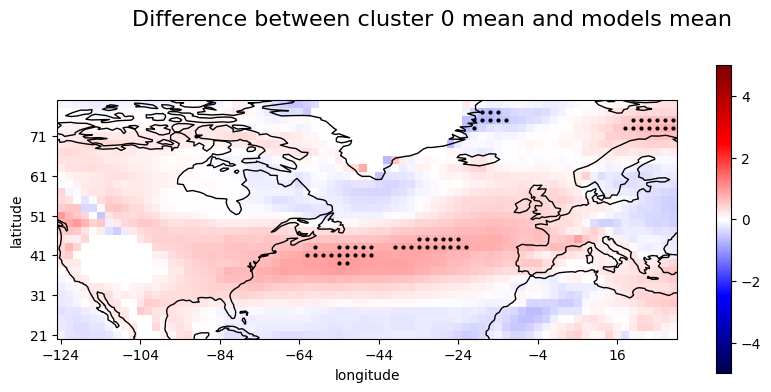

In [5]:
plot_bs_diff_cluster(diff_cluster0,'Difference between cluster 0 mean and models mean',-5,5,(10,4),matrix10_cluster0)

Cluster 1

In [6]:
mean_cluster1 = compute_mean(list_cluster1,models_atmos)
diff_cluster1 = mean_cluster1 - array_mean_cluster1

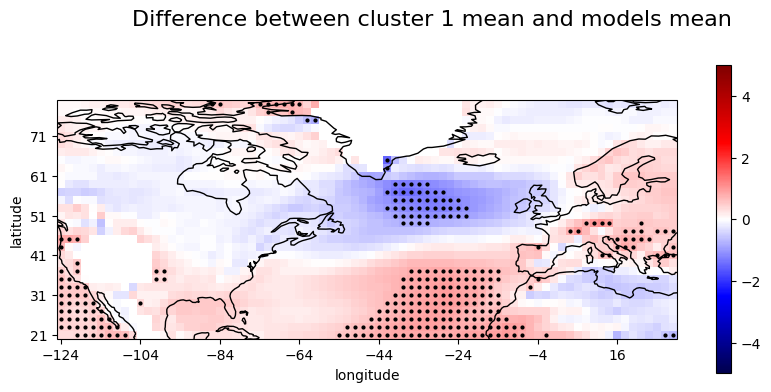

In [7]:
plot_bs_diff_cluster(diff_cluster1,'Difference between cluster 1 mean and models mean',-5,5,(10,4),matrix10_cluster1)

Cluster 2

In [8]:
mean_cluster2 = compute_mean(list_cluster2,models_atmos)
diff_cluster2 = mean_cluster2 - array_mean_cluster2

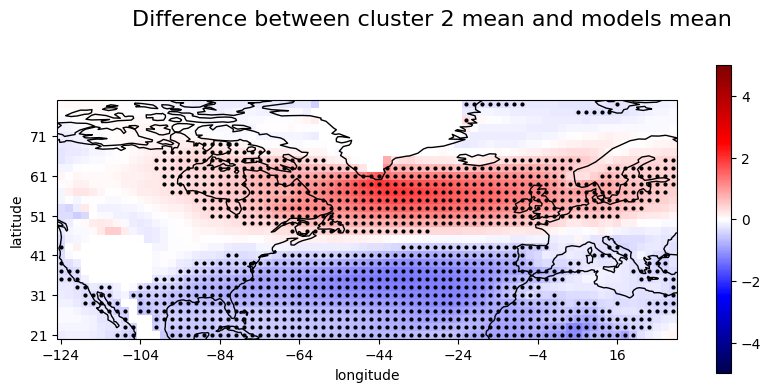

In [9]:
plot_bs_diff_cluster(diff_cluster2,'Difference between cluster 2 mean and models mean',-5,5,(10,4),matrix10_cluster2)

Cluster 3

In [10]:
mean_cluster3 = compute_mean(list_cluster3,models_atmos)
diff_cluster3 = mean_cluster3 - array_mean_cluster3

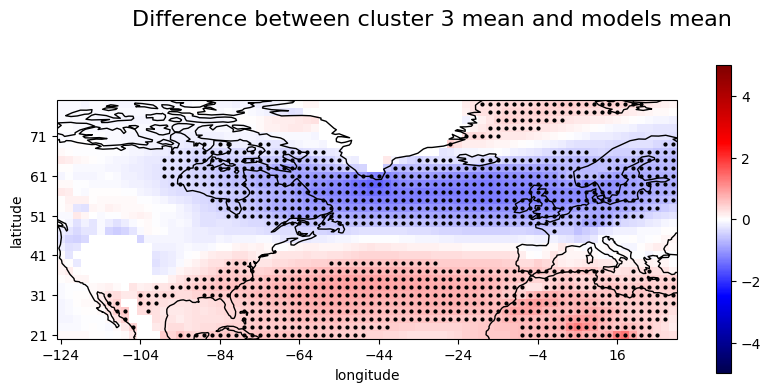

In [11]:
plot_bs_diff_cluster(diff_cluster3,'Difference between cluster 3 mean and models mean',-5,5,(10,4),matrix10_cluster3)

Unisco i plot

In [12]:
cluster_list = ['Cold Atlantic cluster', 'Warm Subpolar Gyre cluster', 'Cold Blob cluster', 'Cold Subtropical Gyre cluster']

/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/home/guest/work/sbeltrami/tesi/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)


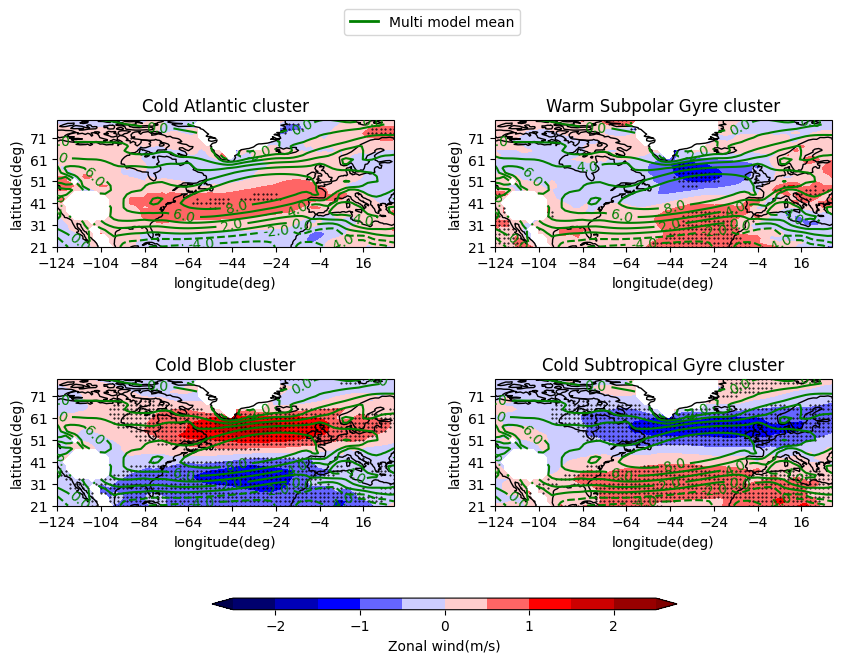

In [13]:
#v_min = -1.8
#v_max = 1.8
k = 0 #indice per cluster
lon = diff_cluster0.lon
lat=diff_cluster0.lat
#plot di diff, cioè la differenza tra il cluster medio e la media della distribuzione bootstrap --> in più ci metto anche i punti di significatività
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,8),subplot_kw={"projection": ccrs.PlateCarree()}) #trasformazione cartografica = lonxlat   
fig.subplots_adjust(hspace=0.5, wspace=0.3)
#ax[0,0]
#plot_mod = ax[0,0].pcolormesh(diff_cluster0.lon, diff_cluster0.lat, diff_cluster0,vmin=v_min, vmax=v_max,cmap='seismic')
plot_mod = ax[0,0].contourf(diff_cluster0.lon, diff_cluster0.lat, diff_cluster0,cmap='seismic',levels=np.linspace(-2.5,2.5,11),add_colorbar=False,extend='both')
coords = np.where(matrix10_cluster0 == 1) #array di valori di longitudini e latitudini in cui matrix10 = 1
# Plot dei punti solo dove matrix10 è uguale a 1
ax[0,0].plot(diff_cluster0.lon[coords[1]], diff_cluster0.lat[coords[0]], marker='o',color='black', markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
contour_models = ax[0,0].contour(lon,lat, array_mean_cluster0, colors='green') #lon,lat
ax[0,0].clabel(contour_models, fmt='%1.1f')
ax[0,0].set_title('Cold Atlantic Cluster')
#contour_cluster = ax[0,0].contour(lon,lat, mean_cluster0, colors='black') #lon,lat
#ax[0,0].clabel(contour_cluster, fmt='%1.1f')

#ax[0,1]
#ax[0,1].pcolormesh(diff_cluster1.lon, diff_cluster1.lat, diff_cluster1,vmin=v_min, vmax=v_max,cmap='seismic')
plot_mod = ax[0,1].contourf(diff_cluster1.lon, diff_cluster1.lat, diff_cluster1,cmap='seismic',levels=np.linspace(-2.5,2.5,11),add_colorbar=False,extend='both') 
coords = np.where(matrix10_cluster1 == 1)
ax[0,1].plot(diff_cluster1.lon[coords[1]], diff_cluster1.lat[coords[0]], marker='o', color='black', markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
contour_models = ax[0,1].contour(lon,lat, array_mean_cluster1, colors='green') #lon,lat
ax[0,1].clabel(contour_models, fmt='%1.1f')
ax[0,1].set_title('Warm Subpolar Gyre Cluster')
#contour_cluster = ax[0,1].contour(lon,lat, mean_cluster1, colors='black') #lon,lat
#ax[0,1].clabel(contour_cluster, fmt='%1.1f')

#ax[0,2]
#ax[1,0].pcolormesh(diff_cluster2.lon, diff_cluster2.lat, diff_cluster2,vmin=v_min, vmax=v_max,cmap='seismic')
plot_mod = ax[1,0].contourf(diff_cluster2.lon, diff_cluster2.lat, diff_cluster2,cmap='seismic',levels=np.linspace(-2.5,2.5,11),add_colorbar=False,extend='both') 
coords = np.where(matrix10_cluster2 == 1)
ax[1,0].plot(diff_cluster2.lon[coords[1]], diff_cluster2.lat[coords[0]], marker='o', color='black', markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
contour_models = ax[1,0].contour(lon,lat, array_mean_cluster2, colors='green') #lon,lat
ax[1,0].clabel(contour_models, fmt='%1.1f')
ax[1,0].set_title('Cold Blob Cluster')
#contour_cluster = ax[0,2].contour(lon,lat, mean_cluster2, colors='black') #lon,lat
#ax[0,2].clabel(contour_cluster, fmt='%1.1f')

#ax[1,0]
#ax[1,1].pcolormesh(diff_cluster3.lon, diff_cluster3.lat, diff_cluster3,vmin=v_min, vmax=v_max,cmap='seismic')
plot_mod = ax[1,1].contourf(diff_cluster3.lon, diff_cluster3.lat, diff_cluster3,cmap='seismic',levels=np.linspace(-2.5,2.5,11),add_colorbar=False,extend='both') 
coords = np.where(matrix10_cluster3 == 1)
ax[1,1].plot(diff_cluster3.lon[coords[1]], diff_cluster3.lat[coords[0]], marker='o', color='black', markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
contour_models = ax[1,1].contour(lon,lat, array_mean_cluster3, colors='green') #lon,lat
ax[1,1].clabel(contour_models, fmt='%1.1f')
ax[1,1].set_title('Cold Subtropical Gyre Cluster')
#contour_cluster = ax[1,0].contour(lon,lat, mean_cluster3, colors='black') #lon,lat
#ax[1,0].clabel(contour_cluster, fmt='%1.1f')

#Imposto valori su assi e titolo
for i in range(2):
    for j in range(2):        
        ax[i,j].set_xticks(np.arange(diff_cluster0.lon.min(),diff_cluster0.lon.max(), 20))
        ax[i,j].set_yticks(np.arange(diff_cluster0.lat.min(),diff_cluster0.lat.max(), 10))
        ax[i,j].coastlines() #gca = get current axis
        ax[i,j].set_ylabel('latitude(deg)')
        ax[i,j].set_xlabel('longitude(deg)')
        #ax[i,j].set_title(f'Cluster {k}')
        ax[i,j].set_title(cluster_list[k])
        k = k + 1 #aggiorno indice per cluster

# Creazione di un oggetto Line2D per la legenda
green_line = Line2D([0], [0], color='green', lw=2, label='Multi model mean')  
#black_line = Line2D([0], [0], color='black', lw=2, label='Cluster mean')   
# Aggiungo la legenda al plot
#fig.legend(handles=[green_line,black_line],loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=1)
fig.legend(handles=[green_line],loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)
# Titolo
fig.colorbar(plot_mod,ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('Zonal wind(m/s)')
#fig.suptitle('Difference between zonal wind climatology and multi-model mean for each cluster, 850 hPa', fontsize=16, y=1.02)
fig.savefig('bootstrap_atmos.pdf', format='pdf')

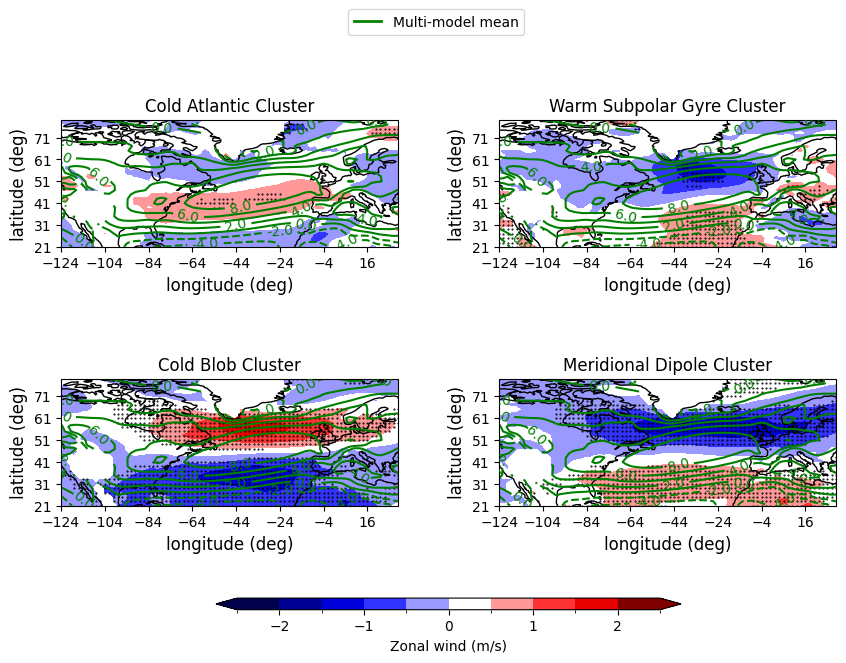

In [14]:
import matplotlib.colors as mcolors

# Define the seismic colormap and modify to have white between 0 and 0.5
seismic_cmap = plt.get_cmap('seismic', 11)  # 11 colors (for the 10 intervals)
colors = seismic_cmap(np.linspace(0, 1, 11))  # Extract colors from the seismic colormap

# Modify the colormap to have white for the [0, 0.5] range
colors[5] = [1, 1, 1, 1]  # Set the middle color to white

# Create the custom colormap
custom_cmap = mcolors.ListedColormap(colors)

# Define custom boundaries
cmap_bounds = [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]
norm = mcolors.BoundaryNorm(cmap_bounds, custom_cmap.N)

# Initialize variables (example)
v_min = -2.5
v_max = 2.5
k = 0  # index for cluster
lon = diff_cluster0.lon
lat = diff_cluster0.lat
cluster_list = ['Cold Atlantic Cluster', 'Warm Subpolar Gyre Cluster', 'Cold Blob Cluster', 'Meridional Dipole Cluster']

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), subplot_kw={"projection": ccrs.PlateCarree()})
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot for Cold Atlantic Cluster
plot_mod = ax[0, 0].contourf(diff_cluster0.lon, diff_cluster0.lat, diff_cluster0, cmap=custom_cmap, 
                             levels=cmap_bounds, norm=norm, extend='both')
coords = np.where(matrix10_cluster0 == 1)
ax[0, 0].plot(diff_cluster0.lon[coords[1]], diff_cluster0.lat[coords[0]], marker='o', color='black', 
              markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
contour_models = ax[0, 0].contour(lon, lat, array_mean_cluster0, colors='green')
ax[0, 0].clabel(contour_models, fmt='%1.1f')
ax[0, 0].set_title('Cold Atlantic Cluster')

# Plot for Warm Subpolar Gyre Cluster
plot_mod = ax[0, 1].contourf(diff_cluster1.lon, diff_cluster1.lat, diff_cluster1, cmap=custom_cmap, 
                             levels=cmap_bounds, norm=norm, extend='both')
coords = np.where(matrix10_cluster1 == 1)
ax[0, 1].plot(diff_cluster1.lon[coords[1]], diff_cluster1.lat[coords[0]], marker='o', color='black', 
              markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
contour_models = ax[0, 1].contour(lon, lat, array_mean_cluster1, colors='green')
ax[0, 1].clabel(contour_models, fmt='%1.1f')
ax[0, 1].set_title('Warm Subpolar Gyre Cluster')

# Plot for Cold Blob Cluster
plot_mod = ax[1, 0].contourf(diff_cluster2.lon, diff_cluster2.lat, diff_cluster2, cmap=custom_cmap, 
                             levels=cmap_bounds, norm=norm, extend='both')
coords = np.where(matrix10_cluster2 == 1)
ax[1, 0].plot(diff_cluster2.lon[coords[1]], diff_cluster2.lat[coords[0]], marker='o', color='black', 
              markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
contour_models = ax[1, 0].contour(lon, lat, array_mean_cluster2, colors='green')
ax[1, 0].clabel(contour_models, fmt='%1.1f')
ax[1, 0].set_title('Cold Blob Cluster')

# Plot for Cold Subtropical Gyre Cluster
plot_mod = ax[1, 1].contourf(diff_cluster3.lon, diff_cluster3.lat, diff_cluster3, cmap=custom_cmap, 
                             levels=cmap_bounds, norm=norm, extend='both')
coords = np.where(matrix10_cluster3 == 1)
ax[1, 1].plot(diff_cluster3.lon[coords[1]], diff_cluster3.lat[coords[0]], marker='o', color='black', 
              markersize=0.5, linestyle='None', transform=ccrs.PlateCarree())
contour_models = ax[1, 1].contour(lon, lat, array_mean_cluster3, colors='green')
ax[1, 1].clabel(contour_models, fmt='%1.1f')
ax[1, 1].set_title('Cold Subtropical Gyre Cluster')

# Set axis properties and titles for each subplot
for i in range(2):
    for j in range(2):        
        ax[i, j].set_xticks(np.arange(diff_cluster0.lon.min(), diff_cluster0.lon.max(), 20))
        ax[i, j].set_yticks(np.arange(diff_cluster0.lat.min(), diff_cluster0.lat.max(), 10))
        ax[i, j].coastlines()
        ax[i, j].set_ylabel('latitude (deg)',fontsize=12)
        ax[i, j].set_xlabel('longitude (deg)',fontsize=12)
        ax[i, j].set_title(cluster_list[k])
        k += 1

# Create a custom legend
green_line = Line2D([0], [0], color='green', lw=2, label='Multi-model mean')  
fig.legend(handles=[green_line], loc='upper center', bbox_to_anchor=(0.5, 0.97), ncol=1)

# Add colorbar with the custom colormap
fig.colorbar(plot_mod, ax=ax, orientation='horizontal', shrink=0.6, aspect=40).set_label('Zonal wind (m/s)')

# Save figure
fig.savefig('bootstrap_atmos.pdf', format='pdf')


Salvataggio pickle

In [15]:
# Salvataggio in un file Pickle
with open('bootstrap.pickle', 'wb') as f: #'wb' = write binary
    pickle.dump(array_2th_cluster0, f) #salvataggio array cluster 0
    pickle.dump(array_97th_cluster0, f)
    pickle.dump(array_mean_cluster0, f)
    pickle.dump(array_std_cluster0, f)
    pickle.dump(matrix10_cluster0, f)
    pickle.dump(diff_cluster0, f)

    pickle.dump(array_2th_cluster1, f) #salvataggio array cluster 1
    pickle.dump(array_97th_cluster1, f)
    pickle.dump(array_mean_cluster1, f)
    pickle.dump(array_std_cluster1, f)
    pickle.dump(matrix10_cluster1, f)
    pickle.dump(diff_cluster1, f)

    pickle.dump(array_2th_cluster2, f) #salvataggio array cluster 2
    pickle.dump(array_97th_cluster2, f)
    pickle.dump(array_mean_cluster2, f)
    pickle.dump(array_std_cluster2, f)
    pickle.dump(matrix10_cluster2, f)
    pickle.dump(diff_cluster2, f)

    pickle.dump(array_2th_cluster3, f) #salvataggio array cluster 3
    pickle.dump(array_97th_cluster3, f)
    pickle.dump(array_mean_cluster3, f)
    pickle.dump(array_std_cluster3, f)
    pickle.dump(matrix10_cluster3, f)
    pickle.dump(diff_cluster3, f)